Task:
As a data analyst, your task is to prepare and analyse the data set using appropriate data preparation and statistical techniques and ultimately apply the machine learning models for the specified tasks. Your analysis should aim to identify any relationships or trends in the data that can be used to improve employee satisfaction, productivity and issues. Recognise suitable independent variables and target variable from the dataset to justify your classification/ prediction tasks. You can perform clustering on the dataset based on your analysis if applicable. You can generate synthetic data or use any additional data to support your machine learning models if required.


Data Preparation
● Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc.[0-10]
● Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA (Exploratory Data Analysis) visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.[0-20]
● Apply encoding, scaling and feature engineering as and if required, detailing how and why you used these techniques and the rationale for your decisions.[0-30]
● Explore the possibility of using dimensional reduction on the dataset. Employ both LDA (Linear Discriminant Analysis) and PCA (Principal Component Analysis) and compare the separation of
classes through visualization. Explain the difference between both techniques in your own words and discuss in detail how your results may affect your analysis of classifying or clustering the normal as compared to anomalous biddings.[0-40]


Machine Learning
● Provide a conceptual understanding and logical justification based on the reasoning for the specific choice of machine learning approaches (supervised/ Unsupervised) for the provided data set. (0-20 marks)
● Machine Learning models can be used for Prediction, Classification, and Clustering. You can choose suitable features for the machine learning models based on feature selection methods, such as random forest or any other method. The selection of hyperparameters for the ML models should be performed by using hyperparameter tuning, such as GridSearchCV. Obtain best accuracy using optimal values of the hyperparameters.. (0-30 marks)
● You should train and test the Machine learning models in the case of supervised learning for different splits (at least 2 different splits) and use appropriate metrics for unsupervised learning. Use K-fold cross-validation to provide authenticity of the modelling outcomes. (0-30 marks)
● Exhibit a comparison of ML modelling outcomes using a Table or graph visualisation. Identify the possible similarities and contrast of the Machine Learning modelling outcomes based on chosen metric and discuss their statistical understanding. (0-20 marks)


Report
A report is required to provide the details of work performed in all tasks. The report should be based on Introduction, rationale of data preparation techniques, machines learning models and conclusions. Illustrations should be used to highlight the details of any section.
This should also include evidence to support your data wrangling and analysis through the use of references and citations.
Conclusions, Findings of data set and references/citations in (HARVARD style). This should be completed in the Jupyter Notebook Markdown.

# Libraries 

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import cross_validate

from sklearn.metrics import make_scorer


License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

DOI
10.24432/C5BS66

Creators
NA NA
National Center for Health Statistics (NCHS) at the Centers for Disease Control and Prevention (CDC)

https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

# EDA

Exploratory Data Analysis. 

After importing the necessary libraries the next step is to do the Exploratory Data Analysis in our raw data to check its characteristics, such as: the size, shape, which kind of features and observations they are, if there are any missing or duplicated values and what kind of distribution it is. EDA was originally developed in 1970 by the American mathematician John Tukey (IBM, 2023). 

This is a crucial task because it is the one that helps us to understand what we are dealing with and which approach we are going to use next to obtain a good accuracy for the Machine Learning Model applied and get effective results. 



In [2]:
age = pd.read_csv("NHANES_age_prediction.csv")

In [3]:
age.tail(2)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


In [4]:
age.shape

(2278, 10)

In [5]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [6]:
age.duplicated().sum()

0

In [7]:
age.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [8]:
age.drop(columns = "SEQN", inplace = True)

SEQN = SEQN	ID	Continuous		Respondent Sequence Number		no

no need for this variable 

In [9]:
age["age_group"].unique()

array(['Adult', 'Senior'], dtype=object)

In [10]:
age["RIDAGEYR"].value_counts()

RIDAGEYR
80.0    107
16.0     70
18.0     70
14.0     60
12.0     58
       ... 
76.0     13
75.0     12
77.0      9
79.0      8
78.0      8
Name: count, Length: 69, dtype: int64

In [11]:
age["RIAGENDR"].value_counts()

RIAGENDR
2.0    1165
1.0    1113
Name: count, dtype: int64

In [12]:
age["age_group"].value_counts()

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_group', ylabel='Count'>

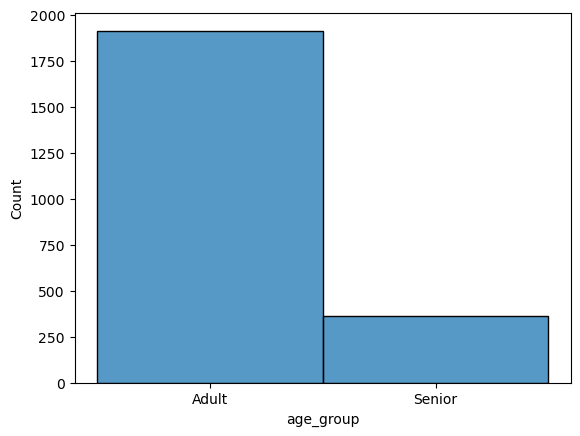

In [13]:
sns.histplot(data = age, x = "age_group")

In [14]:
age = pd.get_dummies(age, dtype = int)

In [15]:
age.tail(2)

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult,age_group_Senior
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1,0
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1,0


In [16]:
age.drop(columns = "age_group_Senior", inplace = True)

In [17]:
age.tail(2)

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1


## Distributions of each column

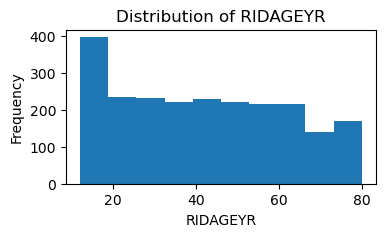

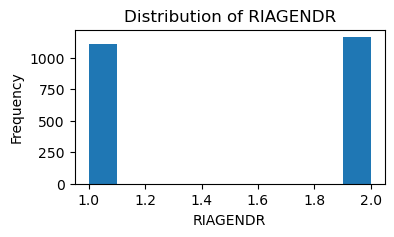

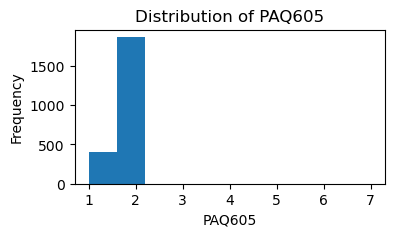

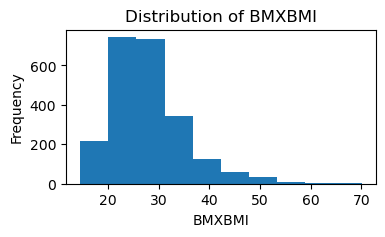

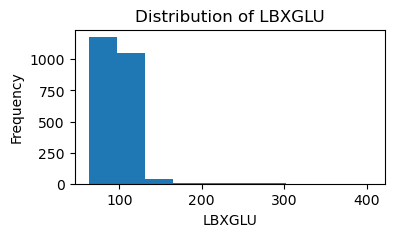

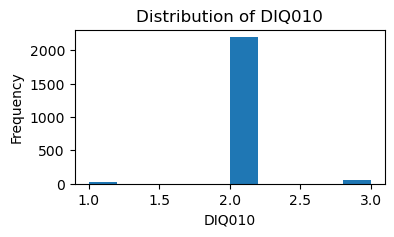

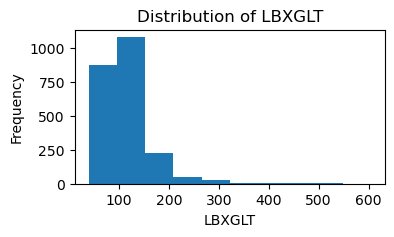

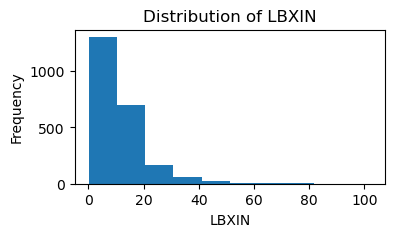

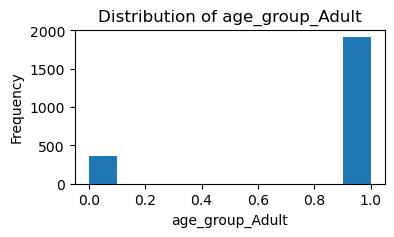

In [18]:
for column in age.columns:
    plt.figure(figsize = (4, 2))
    plt.hist(age[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Boxplot for each column

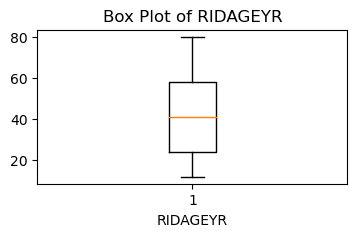

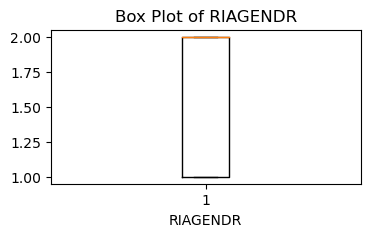

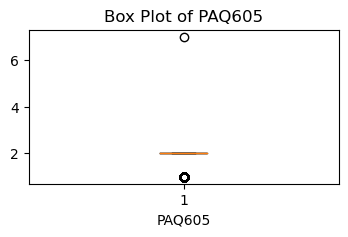

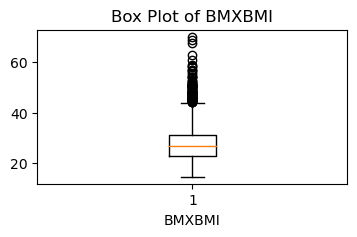

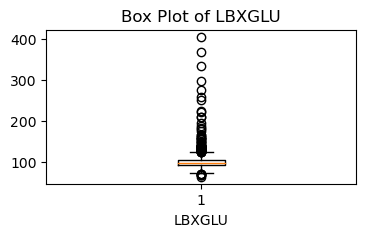

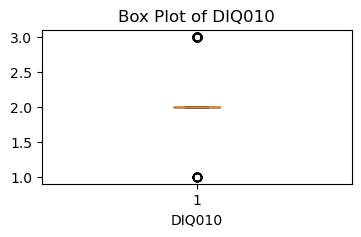

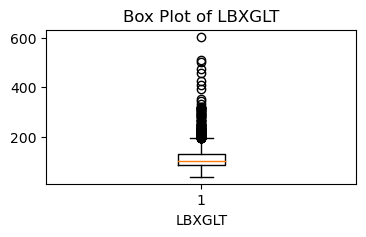

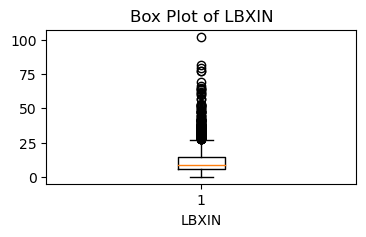

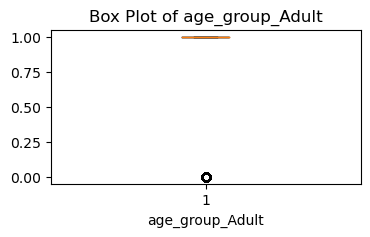

In [19]:
import matplotlib.pyplot as plt

# Assuming 'age' is your DataFrame
for column in age.columns:
    plt.figure(figsize=(4, 2))
    # Convert column to numeric, coercing errors to NaN
    age[column] = pd.to_numeric(age[column], errors='coerce')
    plt.boxplot(age[column].dropna())  # Drop NaN values before plotting
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


# Correlation

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = age.columns
vif_data["VIF"] = [variance_inflation_factor(age.values, i) for i in range(age.shape[1])]
print(vif_data)

          Variable        VIF
0         RIDAGEYR  11.209553
1         RIAGENDR  10.367954
2           PAQ605  20.416338
3           BMXBMI  24.915629
4           LBXGLU  54.956103
5           DIQ010  55.210887
6           LBXGLT  14.247082
7            LBXIN   3.951943
8  age_group_Adult  11.327506


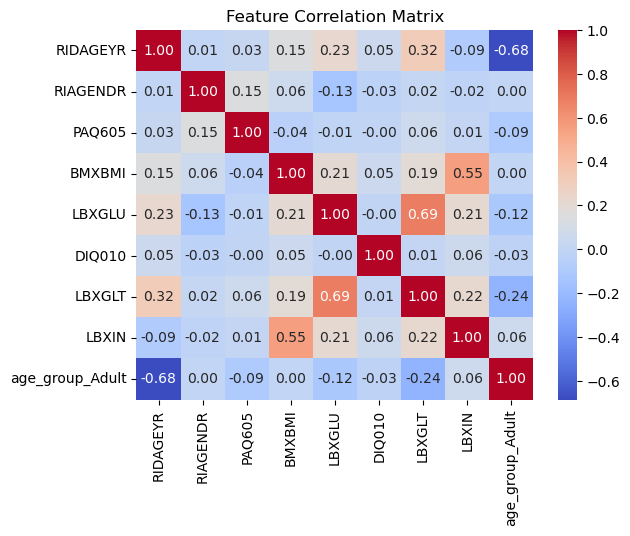

In [21]:
corr_matrix = age.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=age.columns, yticklabels=age.columns)

plt.title("Feature Correlation Matrix")
plt.show()

In [22]:
eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.28735158 1.6442327  0.25546501 0.28328876 0.46698967 1.18954507
 1.07942265 0.96177846 0.83192609]


In [23]:
condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)

Condition Number: 2.992269808680624


In [24]:
def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = age.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

Pairs of highly correlated variables: [(3, 7), (0, 8), (4, 6)]


In [25]:
age.tail()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult
2273,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,1
2274,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,1
2275,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,1
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1


In [26]:
age_array = age.values

In [27]:
X = age_array[:, 0:8]

y = age_array[:, 8]

In [28]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [29]:
X.shape

(2278, 8)

In [30]:
X_with_constant = sm.add_constant(X)

model = sm.OLS(y, X_with_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     278.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:13:46   Log-Likelihood:                -166.09
No. Observations:                2278   AIC:                             350.2
Df Residuals:                    2269   BIC:                             401.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1410      0.078     14.679      0.0

## Normalisation

The MinMax method was chosen given the skeweness of the data. 

In [31]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [32]:
X_scaled

array([[0.72058824, 1.        , 0.16666667, ..., 0.5       , 0.19503546,
        0.14459129],
       [0.20588235, 1.        , 0.16666667, ..., 0.5       , 0.07092199,
        0.03631914],
       [0.05882353, 0.        , 0.16666667, ..., 0.5       , 0.04964539,
        0.05873715],
       ...,
       [0.32352941, 0.        , 0.16666667, ..., 0.5       , 0.14893617,
        0.2082232 ],
       [0.70588235, 1.        , 0.16666667, ..., 0.5       , 0.12056738,
        0.0474792 ],
       [0.20588235, 0.        , 0.16666667, ..., 0.5       , 0.12056738,
        0.03543808]])

# PCA

In [33]:
pca = PCA()

pca.fit(X_scaled)

PCA()

In [34]:
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)

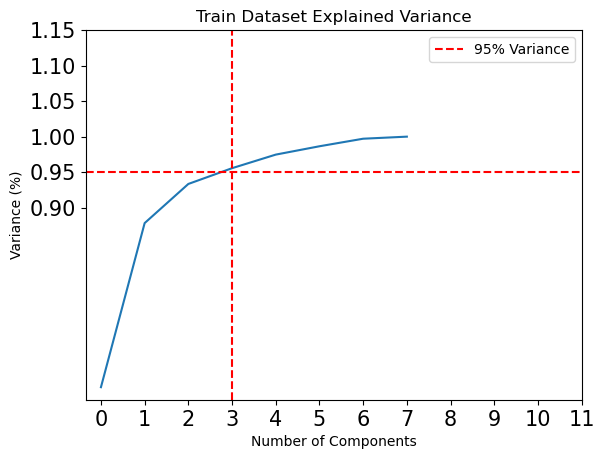

In [35]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 12, 1), fontsize = 15)
plt.ylabel("Variance (%)")
plt.yticks(np.arange(0.90, 1.2, 0.05), fontsize = 15)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
index_95 = np.argmax(cumulative_variance >= 0.95)
plt.axvline(x=index_95, color='r', linestyle='--')
plt.legend()
plt.title("Train Dataset Explained Variance")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 12)

In [37]:
X_scaled.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2278, 8), (2278,), (2050, 8), (228, 8), (2050,), (228,))

# APPLYING PCA

In [38]:
pca = PCA(n_components = 3)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

In [39]:
X_train_pca

array([[ 0.5051172 , -0.1203027 ,  0.03514212],
       [ 0.50541339, -0.04963616, -0.04571383],
       [ 0.51225579, -0.35085995, -0.00665912],
       ...,
       [ 0.50940191, -0.1259566 , -0.03497524],
       [ 0.50251984,  0.12059495,  0.06322992],
       [ 0.51103765, -0.44111322, -0.06147402]])

In [40]:
X_test_pca

array([[-4.97346429e-01,  5.33955595e-02,  1.16236911e-01],
       [-4.98569607e-01,  1.44185999e-01,  1.67260063e-02],
       [-4.95815390e-01,  2.80887703e-02, -5.46797318e-02],
       [-4.90064866e-01, -3.72542665e-01, -1.18193479e-01],
       [ 5.02822682e-01, -1.71846087e-01,  2.44701517e-01],
       [-4.91679659e-01, -9.19212931e-02, -1.58854583e-01],
       [ 5.10389822e-01, -3.55273610e-01, -1.18916546e-01],
       [ 5.01071381e-01,  4.51086233e-01,  5.97485442e-02],
       [-4.98550517e-01,  2.48915084e-01,  4.75082064e-03],
       [ 5.09920743e-01, -3.50851726e-01, -8.62494126e-02],
       [-4.97341253e-01,  1.60323816e-02,  1.68652952e-01],
       [-4.88361976e-01, -3.96917699e-01, -1.10814564e-01],
       [ 5.06753727e-01, -1.89899299e-02,  4.20614851e-02],
       [ 5.01234797e-01,  3.28590620e-01, -1.23230612e-01],
       [-4.93570406e-01, -2.80779240e-01,  1.71960176e-02],
       [-4.88974647e-01, -3.54835634e-01, -1.47516571e-01],
       [-4.90397596e-01, -4.47753852e-01

In [41]:
X_train_pca.shape, X_test_pca.shape

((2050, 3), (228, 3))

# Decision Tree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [44]:
tree_regressor = DecisionTreeRegressor(
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 2,
    random_state = 12
)

tree_regressor.fit(X_train_pca, y_train)

yp_dt = tree_regressor.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_dt)
mse_r = mean_squared_error(y_test, yp_dt, squared = False)
r2 = r2_score(y_test, yp_dt)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.0015838206627680313
Root Mean Squared Error: 0.039797244411743274
R-squared: 0.9894606588154975
Adjusted R-squared: 0.9893195069246337


In [45]:
score_dt = cross_val_score(DecisionTreeRegressor(max_depth = None, min_samples_split = 5, 
                                                 min_samples_leaf = 2, random_state = 12), 
X_test_pca, y_test, cv = 5, scoring = 'r2').mean()

score_dt

0.9291146675821599

In [46]:
train_pred = tree_regressor.predict(X_train_pca)
test_pred = tree_regressor.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_dt, delta = 1.0):
    error = y_test - yp_dt
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_dt, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.0008130081300813008
Validation MSE: 0.0015838206627680313
Mean Huber Loss: 0.0007919103313840157


# Decision Tree Classification

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train_pca, y_train)

y_dt = dt_model.predict(X_test_pca)

accuracy_dt = accuracy_score(y_test, y_dt)
conf_matrix = confusion_matrix(y_test, y_dt)
classification_rep = classification_report(y_test, y_dt)

print(f'Accuracy_dt: {accuracy_dt:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy_dt: 0.9956
Confusion Matrix:
 [[ 42   0]
 [  1 185]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        42
         1.0       1.00      0.99      1.00       186

    accuracy                           1.00       228
   macro avg       0.99      1.00      0.99       228
weighted avg       1.00      1.00      1.00       228



In [48]:
dt_model = DecisionTreeClassifier()

scorer = make_scorer(accuracy_score)

cv_dt = cross_val_score(dt_model, X_train_pca, y_train, cv = 5, scoring = scorer)

print("Cross-validated Accuracy: {:.4f} (+/- {:.4f})".format(cv_dt.mean(), cv_dt.std()))

Cross-validated Accuracy: 0.9888 (+/- 0.0037)


# Random Forest Classification

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [None, 10, 20, 30],  
    
}

rf_model = RandomForestClassifier(random_state = 12)

grid_search = GridSearchCV(rf_model, param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_

best_rf_model = grid_search.best_estimator_
y_rf = best_rf_model.predict(X_test_pca)

accuracy_rf = accuracy_score(y_test, y_rf)
conf_matrix = confusion_matrix(y_test, y_rf)
classification_rep = classification_report(y_test, y_rf)

print(f'Best Parameters: {best_params}')
print(f'Accuracy_rf: {accuracy_rf:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy_rf: 1.0000
Confusion Matrix:
 [[ 42   0]
 [  0 186]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42
         1.0       1.00      1.00      1.00       186

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [50]:
best_rf_model = grid_search.best_estimator_

scorer = make_scorer(accuracy_score)

cv_rf = cross_val_score(best_rf_model, X_train_pca, y_train, cv = 5, scoring = scorer)

print("Cross-validated Accuracy: {:.4f} (+/- {:.4f})".format(cv_rf.mean(), cv_rf.std()))

Cross-validated Accuracy: 0.9927 (+/- 0.0041)


# LDA

In [51]:
num_components = len(np.unique(y)) - 1
print(f'Number of Components for LDA: {num_components}')

Number of Components for LDA: 1


In [52]:
lda = LinearDiscriminantAnalysis(n_components = 1)

X_train_lda = lda.fit_transform(X_train, y_train)

X_test_lda = lda.transform(X_test)

In [53]:
X_train_lda.shape, X_test_lda.shape

((2050, 1), (228, 1))

# KNN Regression

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_lda, y_train)

best_k = grid_search.best_params_['n_neighbors']
#knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
#knn_regressor.fit(X_train, y_train)

best_k

15

In [56]:
knn_regressor = KNeighborsRegressor(n_neighbors = 15, metric = 'manhattan') 

knn_regressor.fit(X_train_lda, y_train)

yp_knn = knn_regressor.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_knn)
mse_r = mean_squared_error(y_test, yp_knn, squared = False)
r2 = r2_score(y_test, yp_knn)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.011695906432748537
Root Mean Squared Error: 0.10814761408717502
R-squared: 0.9221710189452125
Adjusted R-squared: 0.9218266429228461


In [74]:
score_knn = cross_val_score(KNeighborsRegressor(n_neighbors = 15, metric='manhattan'), 
                            X_test_lda, y_test, cv = 5, scoring = 'r2').mean()
score_knn

0.8840013405047603

In [75]:
train_pred = knn_regressor.predict(X_train_lda)
test_pred = knn_regressor.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn, delta = 1.0):
    error = y_test - yp_knn
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.02125311653116531
Validation MSE: 0.011695906432748537
Mean Huber Loss: 0.005847953216374269


# Logistic Regression Classification

In [59]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()

logreg_model.fit(X_train_lda, y_train)

y_lg = logreg_model.predict(X_test_lda)

accuracy_lg = accuracy_score(y_test, y_lg)
conf_matrix = confusion_matrix(y_test, y_lg)
classification_rep = classification_report(y_test, y_lg)

print(f'Accuracy_lg: {accuracy_lg:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy_lg: 0.9868
Confusion Matrix:
 [[ 41   1]
 [  2 184]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        42
         1.0       0.99      0.99      0.99       186

    accuracy                           0.99       228
   macro avg       0.97      0.98      0.98       228
weighted avg       0.99      0.99      0.99       228



In [60]:
logreg_model = LogisticRegression()

scorer = make_scorer(accuracy_score)

cv_lg = cross_val_score(logreg_model, X_train_lda, y_train, cv = 5, scoring = scorer)

print("Cross-validated Accuracy: {:.4f} (+/- {:.4f})".format(cv_lg.mean(), cv_lg.std()))

Cross-validated Accuracy: 0.9698 (+/- 0.0061)


# SVM Classification

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf', 'poly'],  
   
}


svm_model = SVC(random_state = 12)

grid_search = GridSearchCV(svm_model, param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train_lda, y_train)

best_params = grid_search.best_params_

best_svm_model = grid_search.best_estimator_
y_svm = best_svm_model.predict(X_test_lda)

accuracy_svm = accuracy_score(y_test, y_svm)
conf_matrix = confusion_matrix(y_test, y_svm)
classification_rep = classification_report(y_test, y_svm)

print(f'Best Parameters: {best_params}')
print(f'Accuracy_svm: {accuracy_svm:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Best Parameters: {'C': 1, 'kernel': 'linear'}
Accuracy_svm: 0.9868
Confusion Matrix:
 [[ 41   1]
 [  2 184]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        42
         1.0       0.99      0.99      0.99       186

    accuracy                           0.99       228
   macro avg       0.97      0.98      0.98       228
weighted avg       0.99      0.99      0.99       228



In [62]:
best_svm_model = grid_search.best_estimator_

scorer = make_scorer(accuracy_score)

cv_svm = cross_val_score(best_svm_model, X_train_lda, y_train, cv = 5, scoring = scorer)

print("Cross-validated Accuracy: {:.4f} (+/- {:.4f})".format(cv_svm.mean(), cv_svm.std()))

Cross-validated Accuracy: 0.9693 (+/- 0.0070)


# K Neighbors Classification

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2],  
}


knn_model = KNeighborsClassifier()


grid_search = GridSearchCV(knn_model, param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train_lda, y_train)

best_params = grid_search.best_params_

best_knn_model = grid_search.best_estimator_
y_knn = best_knn_model.predict(X_test_lda)

accuracy_knn = accuracy_score(y_test, y_knn)
conf_matrix = confusion_matrix(y_test, y_knn)
classification_rep = classification_report(y_test, y_knn)

print(f'Best Parameters: {best_params}')
print(f'Accuracy_knn: {accuracy_knn:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Best Parameters: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Accuracy_knn: 0.9825
Confusion Matrix:
 [[ 41   1]
 [  3 183]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        42
         1.0       0.99      0.98      0.99       186

    accuracy                           0.98       228
   macro avg       0.96      0.98      0.97       228
weighted avg       0.98      0.98      0.98       228



In [64]:
best_knn_model = grid_search.best_estimator_

scorer = make_scorer(accuracy_score)

cv_knn = cross_val_score(best_knn_model, X_train_lda, y_train, cv = 5, scoring = scorer)

print("Cross-validated Accuracy: {:.4f} (+/- {:.4f})".format(cv_knn.mean(), cv_knn.std()))

Cross-validated Accuracy: 0.9688 (+/- 0.0054)


# Oringial Data

# Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [67]:
tree_regressor = DecisionTreeRegressor(
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    random_state = 12
)

tree_regressor.fit(X_train, y_train)

yp_dt = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, yp_dt)
mse_r = mean_squared_error(y_test, yp_dt, squared = False)
r2 = r2_score(y_test, yp_dt)

n = len(y_test)
k = X_train.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-squared: 1.0
Adjusted R-squared: 1.0


In [68]:
score_dt = cross_val_score(DecisionTreeRegressor(max_depth = None, min_samples_split = 2, 
                                                 min_samples_leaf = 1, random_state = 12), 
X_test, y_test, cv = 5, scoring = 'r2').mean()

score_dt

1.0

In [69]:
train_pred = tree_regressor.predict(X_train)
test_pred = tree_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_dt, delta = 1.0):
    error = y_test - yp_dt
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_dt, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.0
Validation MSE: 0.0
Mean Huber Loss: 0.0


# Decision Tree Classification

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

y_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_dt)
conf_matrix = confusion_matrix(y_test, y_dt)
classification_rep = classification_report(y_test, y_dt)

print(f'Accuracy_dt: {accuracy_dt:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy_dt: 1.0000
Confusion Matrix:
 [[ 42   0]
 [  0 186]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42
         1.0       1.00      1.00      1.00       186

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [71]:
dt_model = DecisionTreeClassifier()

scorer = make_scorer(accuracy_score)

cv_dt = cross_val_score(dt_model, X_train, y_train, cv = 5, scoring = scorer)

print("Cross-validated Accuracy: {:.4f} (+/- {:.4f})".format(cv_dt.mean(), cv_dt.std()))

Cross-validated Accuracy: 1.0000 (+/- 0.0000)


# Random Forest Classification

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [None, 10, 20, 30],  
    
}

rf_model = RandomForestClassifier(random_state = 12)

grid_search = GridSearchCV(rf_model, param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_model = grid_search.best_estimator_
y_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_rf)
conf_matrix = confusion_matrix(y_test, y_rf)
classification_rep = classification_report(y_test, y_rf)

print(f'Best Parameters: {best_params}')
print(f'Accuracy_rf: {accuracy_rf:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy_rf: 1.0000
Confusion Matrix:
 [[ 42   0]
 [  0 186]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42
         1.0       1.00      1.00      1.00       186

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [73]:
best_rf_model = grid_search.best_estimator_

scorer = make_scorer(accuracy_score)

cv_rf = cross_val_score(best_rf_model, X_train, y_train, cv = 5, scoring = scorer)

print("Cross-validated Accuracy: {:.4f} (+/- {:.4f})".format(cv_rf.mean(), cv_rf.std()))

Cross-validated Accuracy: 1.0000 (+/- 0.0000)


# Experiments 

All the experiments performed in the pursuit of the best models and their results can be found in separated Jupyter Notebooks or in the Github Repository, the links are provided in the main file.


- LDA with Regression Algorithms: http://localhost:8888/notebooks/Documents/GitHub/ML/LDA.ipynb

- LDA with Classification Algorithms: http://localhost:8888/notebooks/Documents/GitHub/ML/LDA_Classification.ipynb

- LDA with Oversampling and Regression: http://localhost:8888/notebooks/Documents/GitHub/ML/LDA_Over.ipynb

- LDA with Undersampling and Regression: http://localhost:8888/notebooks/Documents/GitHub/ML/LDA_Under.ipynb

- PCA with Regression Algorithms:http://localhost:8888/notebooks/Documents/GitHub/ML/PCA.ipynb

- PCA with Classification Algorithms: http://localhost:8888/notebooks/Documents/GitHub/ML/PCA_Classification.ipynb

- PCA with Oversampling and Regression: http://localhost:8888/notebooks/Documents/GitHub/ML/PCA_Over.ipynb


- PCA with Undersampling and Regression: http://localhost:8888/notebooks/Documents/GitHub/ML/PCA_Under.ipynb

- Original Data with Regression and Classification Algorithms: http://localhost:8888/notebooks/Documents/GitHub/ML/Original%20Data.ipynb

- Summary of R2 and Accuracy of all Models: https://docs.google.com/spreadsheets/d/1_jueJid0ULbd2rgHKxMRD1Jy-Ke8bujUO5ozr00IkL4/edit#gid=0

- Report commenting the results: https://docs.google.com/document/d/1p2BFYHVDboWd9mrEXTVh0OGbmO2Yr76NnoasbBn3NKA/edit

- Github Repository: https://github.com/izazaka/ML